# Ejercicio 42
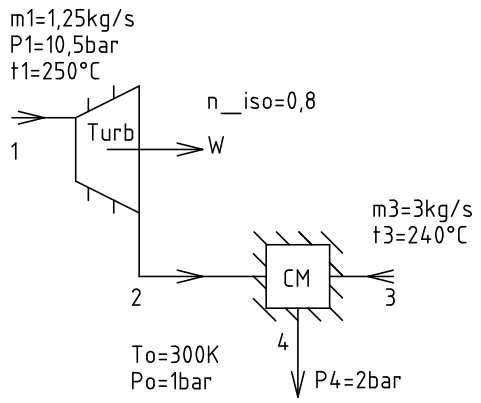

__Calcular:__
1. $\dot{W}$
2. Estado vapor $4$, $(P,t,x)$
3. $\Delta S_u$

## Solución

### Turbina:

$\left.
\begin{array}{l}
P_1 = 10,5 \, \mathrm{bar} \\
t_1 = 250^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_1 \\
s_1
\end{array}
\right]
$

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 4.2 MB/s 


In [ ]:
# Punto 1
# ---------
m1 = 1.25 # kg/s
P1 = 10.5e5 # Pa
T1 = 250 + 273.15 # K
# Consultamos h1 y s1
h1 = cp.PropsSI('H','P',P1,'T',T1,'Water')
s1 = cp.PropsSI('S','P',P1,'T',T1,'Water')

In [ ]:
#@title
# Imprime resultados
print('h1 = %s kJ/kg'%round(h1/1000,2))
print('s1 = %s kJ/kg·K'%round(s1/1000,5))

h1 = 2941.26 kJ/kg
s1 = 6.90124 kJ/kg·K


$\left.
\begin{array}{l}
P_2 = P_3 = P_4 = 2 \, \mathrm{bar} \\
s_{2rev} = s_1
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
s' \\
s''
\end{array}
\right] 
\quad
\left[
\begin{array}{l}
h' \\
h''
\end{array}
\right]
$

In [ ]:
# Punto 2
# ----------
P4 = 2e5 # Pa
P2 = P4
s2rev = s1
# Consultamos s', s'', h', h''
sp1 = cp.PropsSI('S','P',P2,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P2,'Q',1,'Water')
hp1 = cp.PropsSI('H','P',P2,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P2,'Q',1,'Water')

In [ ]:
#@title
# Imprime resultados
print('sp1 = %s kJ/kg·K'%round(sp1/1000,5))
print('sp2 = %s kJ/kg·K'%round(sp2/1000,5))
print('--------------------')
print('hp1 = %s kJ/kg'%round(hp1/1000,2))
print('hp2 = %s kJ/kg'%round(hp2/1000,2))

sp1 = 1.53017 kJ/kg·K
sp2 = 7.12689 kJ/kg·K
--------------------
hp1 = 504.7 kJ/kg
hp2 = 2706.23 kJ/kg


$$ x_{2rev} = \frac{ s_{2rev} - s' }{ s'' - s' } $$

In [ ]:
# Calculamos el título 2 reversible x2rev
x2rev = (s2rev - sp1)/(sp2 - sp1)

In [ ]:
#@title
print('x2rev = %s'%round(x2rev,5))

x2rev = 0.95968


Con el $x_{2rev}$ obtenemos la $h_{2rev}$

$$ h_{2rev} = x_{2rev} (h'' - h') + h' $$

In [ ]:
# Calculamos entalpía 2 reversible
h2rev = x2rev*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h2rev = %s kJ/kg'%round(h2rev/1000,2))

h2rev = 2617.47 kJ/kg


Con el $\eta_{iso}$ obtenemos la $h_2$

$$ \eta_{iso} = \frac{h_1 - h_2}{h_1 - h_{2rev}} $$

Entonces
$$ h_2 = \eta_{iso} (h_{2rev} - h_1) + h_1 $$

In [ ]:
eta_iso = 0.8
# Obtenemos h2
h2 = eta_iso*(h2rev - h1) + h1

In [ ]:
#@title
print('h2 = %s kJ/kg'%round(h2/1000,2))

h2 = 2682.23 kJ/kg


Luego obtenemos el título $x_2$

$$ x_2 = \frac{h_2 - h'}{h'' - h'} $$

In [ ]:
x2 = (h2 - hp1)/(hp2 - hp1)

In [ ]:
#@title
print('x2 = %s'%round(x2,5))

x2 = 0.9891


Obtenemos $s_2$

$$ s_2 = x_2 (s'' - s') + s' $$

In [ ]:
# Con x2 obtenemos s2
s2 = x2*(sp2 - sp1) + sp1

In [ ]:
#@title
print('s2 = %s kJ/kg·K'%round(s2/1000,5))

s2 = 7.06587 kJ/kg·K


Variación de entalpía 1-2
$$ \Delta H_{12} = m_1 ( h_2 - h_1 ) $$

Variación de entropía 1-2
$$ \Delta S_{12} = m_1 (s_2 - s_1) $$

In [ ]:
DH12 = m1*(h2 - h1)
DS12 = m1*(s2 - s1)

In [ ]:
#@title
print('DH12 = %s kJ'%round(DH12/1000,2))
print('DS12 = %s kJ/K'%round(DS12/1000,5))

DH12 = -323.79 kJ
DS12 = 0.20579 kJ/K


Variación de exergía 1-2
$$ \Delta Ex_{12} = \Delta H_{12} - T_0 S_{12} $$

In [ ]:
T0 = 300 # K
DEx12 = DH12 - T0*DS12

In [ ]:
#@title
print('DEx12 = %s kJ'%round(DEx12/1000,2))

DEx12 = -385.53 kJ


Rendimiento exergético de la turbina
$$ \eta_{ex,turb} = \frac{W_T}{| \Delta Ex_{12} |} $$

In [ ]:
WT = abs(DH12)

eta_extu = WT/abs(DEx12)

In [ ]:
#@title
print('eta_extu = %s'%round(eta_extu,4))

eta_extu = 0.8399


### Cámara de mezcla:

$\left.
\begin{array}{l}
P_3 = 2 \, \mathrm{bar} \\
t_3 = 240^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_3 \\
s_3
\end{array}
\right]
$

$$ m_2 + m_3 = m_4 $$

In [ ]:
# Punto 3
# ---------
P3 = 2e5 # Pa
T3 = 240 + 273.15 # K
# Consultamos h3 y s3
h3 = cp.PropsSI('H','P',P3,'T',T3,'Water')
s3 = cp.PropsSI('S','P',P3,'T',T3,'Water')

In [ ]:
#@title
# Imprime resultados
print('h3 = %s kJ/kg'%round(h3/1000,2))
print('s3 = %s kJ/kg·K'%round(s3/1000,5))

h3 = 2951.11 kJ/kg
s3 = 7.67117 kJ/kg·K


In [ ]:
# Calculamos masa 4
m1 = 1.25 # kg/s
m2 = m1
m3 = 3 # kg/s

m4 = m2 + m3

In [ ]:
#@title
print('m4 = %s kg/s'%m4)

m4 = 4.25 kg/s


$$ h_4 = \frac{m_2 h_2 + m_3 h_3}{m_4} $$

In [ ]:
# Calculamos h4
h4 = (m2*h2 + m3*h3)/m4

In [ ]:
#@title
print('h4 = %s kJ/kg'%round(h4/1000,2))

h4 = 2872.03 kJ/kg


In [ ]:
# Consultamos el estado en 4 con P4 y h4
P4 = 2e5 # Pa

cp.PhaseSI('P',P4,'H',h4,'Water')

'gas'

In [ ]:
# Consultamos s4 y T4 con P4 y h4
s4 = cp.PropsSI('S','P',P4,'H',h4,'Water')
T4 = cp.PropsSI('T','P',P4,'H',h4,'Water')

In [ ]:
#@title
print('s4 = %s kJ/kg·K'%round(s4/1000,5))
print('T4 = %s K = %s°C'%(round(T4,2),round(T4 - 273.15,2)) )

s4 = 7.51082 kJ/kg·K
T4 = 473.8 K = 200.65°C


$\begin{array}{l}
\Delta S_{14} = m_1 (s_4 - s_1) \\
\Delta S_{24} = m_2 (s_4 - s_2) \\
\Delta S_{34} = m_3 (s_4 - s_3)
\end{array}$

In [ ]:
DS14 = m1*(s4 - s1)
DS24 = m2*(s4 - s2)
DS34 = m3*(s4 - s3)

In [ ]:
#@title
print('DS14 = %s kJ/K'%round(DS14/1000,5))
print('DS24 = %s kJ/K'%round(DS24/1000,5))
print('DS34 = %s kJ/K'%round(DS34/1000,5))

DS14 = 0.76197 kJ/K
DS24 = 0.55618 kJ/K
DS34 = -0.48105 kJ/K


### Variación de entropía del universo

$$ \Delta S_u = \Delta S_{14} + \Delta S_{34} $$

In [ ]:
DSu = DS14 + DS34

In [ ]:
#@title
print('DSu = %s kW/K'%round(DSu/1000,5))

DSu = 0.28092 kW/K


Variaciones de exergías

$\begin{array}{l}
\Delta Ex_{12} = m_1 (h_2 - h_1) - T_0 \Delta S_{12} \\
\Delta Ex_{24} = m_2 (h_4 - h_2) - T_0 \Delta S_{24} \\
\Delta Ex_{34} = m_3 (h_4 - h_3) - T_0 \Delta S_{34}
\end{array}
$

In [ ]:
DEx12 = m1*(h2 - h1) - T0*DS12
DEx24 = m2*(h4 - h2) - T0*DS24
DEx34 = m3*(h4 - h3) - T0*DS34

In [ ]:
#@title
print('DEx12 = %s kJ'%round(DEx12/1000,2))
print('DEx24 = %s kJ'%round(DEx24/1000,2))
print('DEx34 = %s kJ'%round(DEx34/1000,2))

DEx12 = -385.53 kJ
DEx24 = 70.4 kJ
DEx34 = -92.94 kJ


### Rendimiento exergético del proceso

$$ \eta_{ex,proc} = \frac{W_T + \Delta Ex_{24}}{ | \Delta Ex_{12} + \Delta Ex_{34} | } $$

In [ ]:
eta_exproc = (WT + DEx24)/abs(DEx12 + DEx34)

In [ ]:
#@title
print('eta_exproc = %s'%round(eta_exproc,4))

eta_exproc = 0.8239


In [ ]:
#@title
print('Resumen:')
print('--------')
print('WT = %s kJ/kg'%round(WT/1000,2))
print('P4 = %s kPa = %s bar'%(round(P4/1000,2),round(P4/1e5,2)))
print('T4 = %s K = %s°C'%(round(T4,2),round(T4 - 273.15,2)) )
print('DSu = %s kW/K'%round(DSu/1000,4))

Resumen:
--------
WT = 323.79 kJ/kg
P4 = 200.0 kPa = 2.0 bar
T4 = 473.8 K = 200.65°C
DSu = 0.2809 kW/K
